In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

In [5]:
# Compile the model
model.compile(
    optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True), 
    metrics=['accuracy']
)

In [6]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

datagen.fit(train_images)

In [7]:
# Train the model with data augmentation
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    steps_per_epoch=len(train_images) / 64,
    epochs=5,
    validation_data=(test_images, test_labels)
)

Epoch 1/5
781/781 [==============================] - 28s 34ms/step - loss: 1.7152 - accuracy: 0.1101 - val_loss: 1.4056 - val_accuracy: 0.0728
Epoch 2/5
781/781 [==============================] - 25s 32ms/step - loss: 1.3975 - accuracy: 0.0964 - val_loss: 1.2558 - val_accuracy: 0.0955
Epoch 3/5
781/781 [==============================] - 25s 32ms/step - loss: 1.2755 - accuracy: 0.0953 - val_loss: 1.1516 - val_accuracy: 0.0725
Epoch 4/5
781/781 [==============================] - 27s 34ms/step - loss: 1.1877 - accuracy: 0.0967 - val_loss: 1.1190 - val_accuracy: 0.0803
Epoch 5/5
781/781 [==============================] - 29s 38ms/step - loss: 1.1318 - accuracy: 0.0966 - val_loss: 1.0146 - val_accuracy: 0.1050


In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 2s - loss: 1.0146 - accuracy: 0.1050 - 2s/epoch - 8ms/step

Test accuracy: 0.10499999672174454


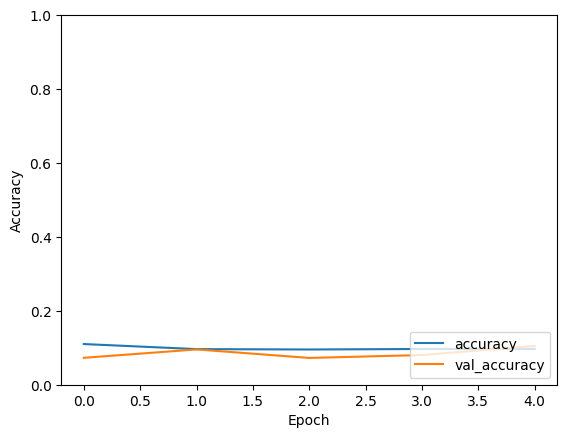

In [9]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()